In [4]:
using BeamLib: IsotropicArray, steerphi, capon
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# Capon spectrum 
# Same as steering capon_weights / mpdr_weights 
# but using the capon function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = capon.(Ref(pa), Ref(Rxx), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{ComplexF64}:
  0.3465940763383218 - 1.3644849890176624e-15im
  0.3460047932664741 + 6.78373444924003e-16im
 0.34423943528571416 + 3.5015615603589374e-16im
  0.3413058416487427 - 3.79103476690997e-16im
 0.33721825093198743 - 4.723952222622674e-16im
  0.3319989050481758 - 3.624386526319394e-16im
 0.32567999461408187 - 9.167685949422033e-17im
 0.31830567308077756 - 9.152240892514426e-16im
  0.3099338315393359 - 6.26050578751319e-16im
  0.3006373247717845 - 7.230724399849437e-16im
                     ⋮
  0.3631343383077455 - 7.684923302888767e-16im
  0.3541990117999155 - 2.670086083023625e-16im
  0.3465093390371851 - 4.187460471536297e-16im
  0.3400535737851647 - 4.605775204067145e-16im
  0.3348122742057771 - 6.301333402129185e-16im
  0.3307638159209099 - 5.550673881536368e-16im
  0.3278881950841094 + 1.4051705854362248e-16im
 0.32616956663401275 - 5.165360438776462e-16im
 0.32559784233618627 - 1.1096361686844073e-16im

In [5]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(abs.(P)).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

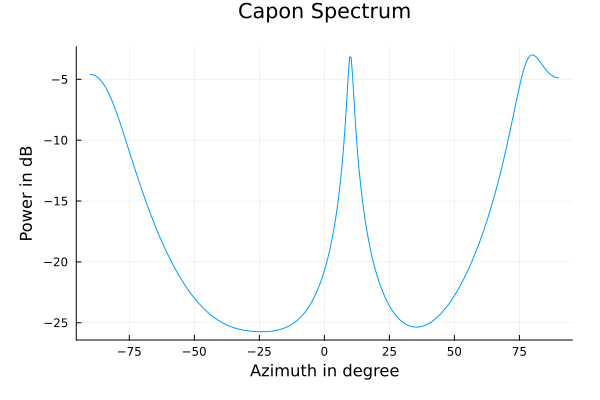

In [6]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(abs.(P)))
plot!(title="Capon Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")